In [1]:
# Import dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import HistGradientBoostingRegressor


# Read the file
file_to_read="data/listings.csv.gz"
data_df=pd.read_csv(file_to_read)
print(data_df.shape)
data_df.head()

(15171, 74)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20220605131750,2022-06-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.08
1,8077,https://www.airbnb.com/rooms/8077,20220605131750,2022-06-05,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,...,4.90,4.92,4.83,NaN,t,2,1,1,0,1.08
2,27423,https://www.airbnb.com/rooms/27423,20220605131750,2022-06-05,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",NaN,https://a0.muscache.com/pictures/176936/b687ed...,118124,https://www.airbnb.com/users/show/118124,...,5.00,4.82,4.82,NaN,f,1,1,0,0,0.18
3,30931,https://www.airbnb.com/rooms/30931,20220605131750,2022-06-05,Downtown Toronto - Waterview Condo,Split level waterfront condo with a breathtaki...,NaN,https://a0.muscache.com/pictures/227971/e8ebd7...,22795,https://www.airbnb.com/users/show/22795,...,NaN,NaN,NaN,NaN,f,2,1,1,0,0.01
4,40456,https://www.airbnb.com/rooms/40456,20220605131750,2022-06-05,Downtown- King Size Bed and Parking,---------------------Renovated and Newly Furn...,This is Nice Neighborhood located in Downtown ...,https://a0.muscache.com/pictures/b36b6ae3-20aa...,174063,https://www.airbnb.com/users/show/174063,...,4.96,4.57,4.68,NaN,f,4,4,0,0,0.79


# Data Cleaning and Transformation

In [2]:
#Check the columns in the dataset
data_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

#### The aim of this project is to predict AirBnB prices. Since we are not using Natural Language Processing, we will drop the columns that are not required for the purpose of this project.

In [3]:
cols_to_drop=['listing_url', 'scrape_id', 'last_scraped', 'description', 'neighborhood_overview','picture_url','host_id',
              'host_url','host_name', 'host_location','host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
              'host_verifications', 'bathrooms_text', 'host_acceptance_rate', 'neighbourhood_group_cleansed','minimum_minimum_nights',
              'maximum_minimum_nights', 'minimum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
              'calendar_last_scraped', 'license','calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
              'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms','host_has_profile_pic',
              'maximum_nights_avg_ntm', 'has_availability', 'number_of_reviews_l30d','host_total_listings_count','neighbourhood','calendar_updated','reviews_per_month']
             
    
data_df=data_df.drop(cols_to_drop, axis=1)
data_df.head()

,id,name,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,1419,Beautiful home in amazing area!,2008-08-08,NaN,NaN,f,1.0,t,Little Portugal,43.64590,...,2015-07-19,2017-12-04,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f
1,8077,Downtown Harbourfront Private Room,2009-06-22,NaN,NaN,f,2.0,f,Waterfront Communities-The Island,43.64080,...,2009-08-20,2013-08-27,4.84,4.81,4.89,4.87,4.90,4.92,4.83,t
2,27423,Executive Studio Unit- Ideal for One Person,2010-05-04,within a few hours,100%,f,1.0,t,South Riverdale,43.66884,...,2010-06-07,2011-08-30,4.92,5.00,4.82,5.00,5.00,4.82,4.82,f
3,30931,Downtown Toronto - Waterview Condo,2009-06-22,NaN,NaN,f,2.0,f,Waterfront Communities-The Island,43.64015,...,2010-08-11,2010-08-11,5.00,NaN,NaN,NaN,NaN,NaN,NaN,f
4,40456,Downtown- King Size Bed and Parking,2010-07-20,within an hour,100%,t,3.0,t,South Parkdale,43.63539,...,2010-08-03,2022-01-29,4.63,4.64,4.66,4.95,4.96,4.57,4.68,f


In [4]:
# Check for null values
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           15171 non-null  int64  
 1   name                         15169 non-null  object 
 2   host_since                   15168 non-null  object 
 3   host_response_time           10451 non-null  object 
 4   host_response_rate           10451 non-null  object 
 5   host_is_superhost            15168 non-null  object 
 6   host_listings_count          15168 non-null  float64
 7   host_identity_verified       15168 non-null  object 
 8   neighbourhood_cleansed       15171 non-null  object 
 9   latitude                     15171 non-null  float64
 10  longitude                    15171 non-null  float64
 11  property_type                15171 non-null  object 
 12  room_type                    15171 non-null  object 
 13  accommodates    

#### Cleaning and Transforming Individual Columns

#### *host_since*

In [5]:
#Convert object to datetime
data_df["host_since"]=pd.to_datetime(data_df["host_since"])

#Calculate the number of days
data_df["host_active_days"]=(pd.datetime(2022,6, 6)-data_df["host_since"]).astype('timedelta64[D]')

#Calculate the mean and median
print(round(data_df["host_active_days"].mean(),2))
print(data_df["host_active_days"].median())

# Fill the null values with median values
data_df["host_active_days"].fillna(data_df["host_active_days"].median(), inplace=True)

#Drop the original column
data_df.drop(["host_since"], axis=1, inplace=True)

2083.97
2134.0


C:\Users\SUKANY~1\AppData\Local\Temp/ipykernel_3660/2394024977.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_df["host_active_days"]=(pd.datetime(2022,6, 6)-data_df["host_since"]).astype('timedelta64[D]')


#### *host_response_time*

In [6]:
print("Null Values:", data_df["host_response_time"].isnull().sum())
print("Proportion:", round(data_df["host_response_time"].isna().sum()/len(data_df)*100,1))

#Replace null values with "unknown"
data_df["host_response_time"].fillna("unknown", inplace=True)
data_df["host_response_time"].value_counts()

Null Values: 4720
Proportion: 31.1


within an hour        6393
unknown               4720
within a few hours    2051
within a day          1431
a few days or more     576
Name: host_response_time, dtype: int64

#### *host_response_rate*

In [7]:
# Convert column datatype to float
data_df["host_response_rate"]=data_df["host_response_rate"].str[:-1].astype('float64')

#Bin the values into four categories
bins=[0, 50, 90,99, 100]
group_names=["0-49%", "50-89%", "90-99%", "100%"]
data_df["host_response_rate"]= pd.cut(data_df["host_response_rate"], bins=bins, labels=group_names, include_lowest=True)


In [8]:
# Convert column to string
data_df["host_response_rate"]= data_df["host_response_rate"].astype('str')

#Replace null values with "unknown"
data_df["host_response_rate"].replace("nan", "unknown", inplace=True)

#Check the value counts
data_df["host_response_rate"].value_counts()

100%       6995
unknown    4720
50-89%     1471
90-99%     1299
0-49%       686
Name: host_response_rate, dtype: int64

#### *property_types*

In [9]:
#Replacing and grouping multiple categories into main heads

data_df["property_type"].replace({
    "Entire home": "House",
    "Private room in rental unit": "One Room",
    "Entire rental unit": "Apartment",
    "Entire condo" : "Apartment",
    "Private room in home": "One Room",
    "Private room in condo": "One Room",
    "Shared room in parking space": "Shared Room",
    "Entire guest suite": "Apartment",
    "Entire townhouse": "House",
    "Private room in bed and breakfast": "One Room",
    "Private room in townhouse": "One Room",
    "Private room in tiny home": "One Room",
    "Private room in guest suite": "One Room",
    "Private room in loft": "One Room",
    "Private room in cottage" : "One Room",
    "Private room in bungalow": "One Room",
    "Private room in guesthouse": "One Room",
    "Private room": "One Room",
    "Private room in vacation home": "One Room",
    "Private room in floor": "One Room",
    "Private room in villa": "One Room",
    "Room in hostel": "One Room",
    "Private room in castle": "One Room",
    "Room in hotel": "One Room",
    "Private room in barn": "One Room",
    "Room in boutique hotel": "One Room",
    "Room in bed and breakfast": "One Room",
    "Private room in serviced apartment": "One Room",
    "Private room in casa particular": "One Room",
    "Private room in earthen home" : "One Room",
    "Room in aparthotel": "One Room",
    "Private room in hut": "One Room",
    "Private room in hostel": "One Room",
    "Private room in holiday park": "One Room",
    "Shared room in rental unit" : "Shared Room",
    "Shared room in home": "Shared Room",
    "Shared room in condo": "Shared Room",
    "Shared room in townhouse": "Shared Room",
    "Shared room in bed and breakfast": "Shared Room",
    "Shared room in bungalow": "Shared Room",
    "Shared room in hostel": "Shared Room",
    "Shared room in loft": "Shared Room",
    "Shared room in guesthouse": "Shared Room",
    "Shared room in villa": "Shared Room",
    "Shared room in barn": "Shared Room",
    "Shared room in boat": "Shared Room",
    "Shared room in hotel": "Shared Room",
    "Shared room in guest suite": "Shared Room",
    "Entire bungalow": "House",
    "Tiny home": "House",
    "Entire villa": "House",
    "Entire place": "House",
    "Entire cottage": "House",
    "Earthen home": "House",
    "Entire vacation home": "House",
    "Entire serviced apartment": "Apartment",
    "Entire loft": "Apartment",
    "Entire guesthouse": "House",
    "Entire home/apt": "House"},inplace=True)

#Replacing other categories with 'other'
data_df.loc[~data_df["property_type"].isin(["House", "Apartment", "One Room", "Shared Room"]), "property_type"]="Other"
    
# Check the property type value count
data_df["property_type"].value_counts()

Apartment      7885
One Room       4700
House          2443
Shared Room     131
Other            12
Name: property_type, dtype: int64

#### *bathrooms, bedrooms and beds*

In [10]:
#Drop the bathroom column since no data is available
data_df=data_df.drop("bathrooms", axis=1)

In [11]:
# Replace missing values with median for bedrooms and beds
for col in ["bedrooms", "beds"]:
    data_df[col].fillna(data_df[col].median(), inplace=True)

In [12]:
data_df["amenities"]

0        ["Smoke alarm", "Dryer", "Washer", "Air condit...
1        ["Pool", "Smoke alarm", "Free parking on premi...
2        ["Central heating", "Barbecue utensils", "Drye...
3        ["Pool", "Smoke alarm", "Free parking on premi...
4        ["Washer", "Heating", "Dishwasher", "Wifi", "K...
                               ...                        
15166    ["Smoke alarm", "Dryer", "Washer", "Refrigerat...
15167    ["Dryer", "Washer", "Toaster", "Patio or balco...
15168    ["Central heating", "Dryer", "Washer", "Securi...
15169    ["Washer", "Cleaning before checkout", "Heatin...
15170    ["Lockbox", "Patio or balcony", "Heating", "Wi...
Name: amenities, Length: 15171, dtype: object

#### *amenities*

In [13]:
#Creating a set of amenities
amenities_list = list(data_df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

In [14]:
#Grouping the amenities into separate columns with 1 if amenities present and 0 if not present
data_df.loc[data_df['amenities'].str.contains('shampoo|body soap|One Man Jack body soap|Kirkland Bodywash body soap|Different types shampoo|Several hotel brands body soap|V05 shampoo|Head & shoulders  conditioner|Several Hotel Brands Available body soap|Shampoo|dove  body soap|Pantene or Herbal Essences shampoo|Alaffia EveryDay Shea Conditioner Lavender conditioner|Herbal Essence Body Wash body soap|Pert shampoo|Le Labo conditioner|Natural bar soaps will be provided  body soap|L\'oreal shampoo|Loreal body soap|Basic  body soap|Premium  body soap|Pantene  shampoo|L\'Or\\u00e9al conditioner|Salon brands shampoo|Truly Earth body soap|Coconut conditioner|L\\u2019Or\\u00e9al  body soap|TRESEMME conditioner|Body wash body soap|Yves Rocher shampoo|Adidas conditioner|Aveena conditioner|L\'Oreal  body soap|Olay body soap|Canadian shampoo|Pantene Pro V conditioner|Generic body soap|Myriade d\\u2019arabe shampoo|Basic shampoo|Sukin body soap|TRESemm\\u00e9 shampoo|Name brand  body soap|Dove conditioner conditioner|Ivory bar soap body soap|Tresemme conditioner|Boo Bamboo Conditioner conditioner|Coconut shampoo|Body lotion and soap body soap|Dove bar soap  body soap|Eco Botanics  conditioner|Best available neutral body wash body soap|Head & Shoulders shampoo|Softsoap  body soap|Head&shoulder shampoo|Irish Fresh body soap|Alaffia body soap|Dr Bronners  body soap|Pears body soap|Various brands  shampoo|Regular  shampoo|Everyone shampoo|Numerous  body soap|Dove - Natural  body soap|Plushresidence brand body soap|North American Hemp Co. - natural product body soap|Argan Oil conditioner|we will arrange for it body soap|Hypoallergenic body soap|Soft body soap|Head and Shoulder shampoo|Essenes  body soap|Pantene 2-in-1 conditioner|Ivory Bar Soap body soap|Kirkland/ivory or similar body soap|Head & Shoulders conditioner|Pantene Daily Moisture Renewal shampoo|Ivory clean body soap|LUSH body soap|H&S shampoo|Natural conditioner|Head And Shoulder|Different  shampoo|Lavender soap from bulk barn body soap|Truly Earth shampoo|Pantene or similar conditioner|Nivea & Dove body soap|Toiletries|Head&Shoulder shampoo|Eco Botanics  body soap|Dr. Bronner\\u2019s body soap|Body Wash body soap|Noname conditioner|KIRKLAND shampoo|organic hypo-allergenic body soap|Organic conditioner|Liveclean shampoo|Iris Spring body soap|Dove  shampoo|Various conditioner|Variety brands body soap|Various brands  conditioner|TRESemm\\u00e9 conditioner|Alaffia - natural product conditioner|Johnsons & Johnson conditioner|Hotel Brands Available shampoo|General body soap|Moroccan oil conditioner|Natural shampoo|No name body soap|Luxury shampoo|Old Spice ?  body soap|Several hotel brands  conditioner|American  body soap|Assorted Quality Brands  shampoo|H\\u00f4tel-time shampoo|No name  body soap|Prosilk  shampoo|Known brands shampoo|IVORY clean body soap|Iris spring  body soap|Herbal Essence shampoo|Tre semme conditioner|SOS and lemon dish soap conditioner|Marc Antony conditioner|ProSilk body soap|Garnier Fructis shampoo|Aveeno body soap'),"toiletries"]=1
data_df.loc[data_df['amenities'].str.contains('Game console|Philip sound system with Bluetooth and aux|Record player|TV|TV with standard cable|Cable TV|39\\ TV|Beats Speaker sound system with Bluetooth and aux|JBL Bluetooth sound system|40\\ HDTV with Netflix|55\\ TV with Amazon Prime Video|90\\ TV with Apple TV|44\\ HDTV with Roku|43\\ TV|32\\ TV with Chromecast|Game console: Nintendo Wii and Xbox One|Alexa sound system with Bluetooth and aux|43\\ TV|36\\ HDTV|57\\ HDTV with Netflix|46\\ HDTV with Roku|68\\ HDTV with Netflix|46\\ HDTV with standard cable|46\\ TV with Chromecast|Radio and CD player sound system|Savant sound system|Radio and CD player sound system|24\\ TV with Chromecast|Sony  sound system with aux|Sonos\\u2122 Bluetooth sound system|55\\ TV with Chromecast|Google Smart Speaker Bluetooth sound system|Roku Bluetooth sound system|HDTV with standard cable|52\\ HDTV|Bluetooth speaker Bluetooth sound system|Denon sound system|54\\ HDTV with Apple TV|Chromecast|37\\ HDTV with Amazon Prime Video|Samsung Sound Bar sound system with Bluetooth and aux|26\\ HDTV with standard cable|Denon - connect via wifi sound system|42\\ HDTV with Netflix|78\\ HDTV with Netflix|37\\ TV with Netflix|75\\ HDTV|Alexa sound system|Samsung Bluetooth Speaker  Bluetooth sound system|43\\ HDTV with Amazon Prime Video|60\\ TV with standard cable|47\\ TV with Roku|Sonos 5 & 1 Bluetooth sound system|49\\ HDTV with Netflix|Netflix|43\\ HDTV with Amazon Prime Video|43\\ HDTV with standard cable|50\\ HDTV with HBO Max|Bose Boom Box Bluetooth sound system|30\\ HDTV with Netflix|46\\ HDTV|48\\ HDTV with Chromecast|Sonos or Old School Turntable sound system with Bluetooth and aux|52\\ HDTV with premium cable|48\\ HDTV with Roku|50\\ HDTV with Netflix|Game console: PS4|60\\ HDTV with standard cable|Wonderboom Bluetooth sound system|Bose sound touch Bluetooth sound system|Wireless speakers available - compatible with all electronic devices sound system|55\\ TV with Netflix|48\\ TV with standard cable|TV with Apple TV|43\\ TV with Roku|54\\ HDTV with Apple TV|Alexa - Amazon  sound system|42\\ HDTV with Roku|65\\ HDTV with Amazon Prime Video|52\\ TV|32\\ HDTV|SONOS Bluetooth sound system|40\\ HDTV with Roku|58\\ HDTV with Apple TV|Samsung Soundbar Bluetooth sound system|37\\ HDTV with|50\\ HDTV with Roku|82\\ HDTV with Netflix|85\\ HDTV|85\\ HDTV with Amazon Prime Video|37\\ HDTV with Netflix|42\\ TV with Amazon Prime Video|32\\ TV with premium cable|Marshall Bluetooth sound system|45\\ HDTV with|46\\ HDTV with Netflix|42\\ HDTV with Netflix|TV with HBO Max|65\\ TV with Amazon Prime Video|Bose Bluetooth  Bluetooth sound system|Eneby Bluetooth sound system|LG Soundbar and Sub sound system|55\\ HDTV with Amazon Prime Video|47\\ TV with Netflix|48\\ TV|32\\ TV with Apple TV|58\\ HDTV|Polaroid sound system with Bluetooth and aux|40\\ HDTV with premium cable|70\\ HDTV with Apple TV|42\\ HDTV|48\\ HDTV with Apple TV|18\\ TV with Netflix|43\\ TV with Chromecast|Sound system|55\\ TV with standard cable|46\\ HDTV with Amazon Prime Video|38\\ TV|Google Home sound system|45\\ HDTV with Roku|30\\ HDTV|54\\ HDTV with Netflix|65\\ HDTV|55\\ HDTV with premium cable|40\\ HDTV with Chromecast|36\\ HDTV|37\\ TV with Netflix|65\\ TV with Apple TV|65\\ HDTV with premium cable|78\\ HDTV with Netflix|70\\ HDTV with Netflix|Sony 7.2 Surround Sound sound system with Bluetooth and aux|50\\ TV with Amazon Prime Video|Bose Mini Bluetooth sound system|45\\ HDTV|90\\ TV with Apple TV|Chromecast|65\\ HDTV with Apple TV|49\\ TV with Apple TV|Sony sound system|70\\ HDTV with Chromecast|52\\ TV with|33\\ HDTV with Chromecast|30\\ HDTV with Amazon Prime Video|46\\ HDTV with Amazon Prime Video|45\\ TV with Amazon Prime Video'), 'high_end_electronics'] = 1
data_df.loc[data_df['amenities'].str.contains('Air conditioning|Window AC unit|Central air conditioning|Heating|Indoor Fireplace|Central Heating|Central air conditioning|Central heating'), 'ac_heater'] = 1
data_df.loc[data_df['amenities'].str.contains('Internet|Pocket wifi|Wifi|wifi'), 'internet'] = 1
data_df.loc[data_df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque|Barbecue utensils'), 'bbq'] = 1
data_df.loc[data_df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
data_df.loc[data_df['amenities'].str.contains('Freezer|Hot water kettle|Microwave|Fridge|Toaster Oven|Samsung  stainless steel stove|Paid dryer|GE stainless steel oven|Samsung refrigerator|LG - Stainless Steel refrigerator|G.E.  stainless steel gas stove|Induction stove|GE Self Clean stainless steel oven|Brevettie  oven|Hair dryer|Hot plates  electric stove|Black & Decker stainless steel oven|Smsub oven|FRIGIDAIRE refrigerator|Dryer|Hangers|stove|Dishwasher|mini-fridge|electric stove|Washer'), "home_appliances"]=1
data_df.loc[data_df['amenities'].str.contains('Coffee maker|Nespresso|Pour-over coffee|Cafe'),'coffee_machine']=1
data_df.loc[data_df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
data_df.loc[data_df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
data_df.loc[data_df['amenities'].str.contains('Fire extinguisher|Smoke alarm|First aid kit'),'safety']=1
data_df.loc[data_df['amenities'].str.contains('Balcony|Patio|Private fenced garden or backyard|Garden|Outdoor|Sun loungers|Terrace|Backyard'), 'outdoor_space'] = 1
data_df.loc[data_df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
data_df.loc[data_df['amenities'].str.contains('Ceiling fan|Bathtub|Clothing storage|closet|walk-in closet|Room-darkening shades|Crib|Bedroom comforts|Dedicated workspace|Extra pillows and blankets|Bed Linens|linens'),"room_features"]=1
data_df.loc[data_df['amenities'].str.contains('Family/kid friendly|Children|children|Baby bath'), 'child_friendly'] = 1
data_df.loc[data_df['amenities'].str.contains('Laundry services|Hot water|Laundromat|Free carport on premises|EV charger'),"other_facilities"]=1
data_df.loc[data_df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
data_df.loc[data_df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront|Kayak'), 'nature_and_views'] = 1
data_df.loc[data_df['amenities'].str.contains('Free parking on premises|Paid parking on premises|parking|valet parking'), 'parking'] = 1
data_df.loc[data_df['amenities'].str.contains('Cooking basics|Kitchen'), 'kitchen'] = 1
data_df.loc[data_df['amenities'].str.contains('Elevator'), 'elevator'] = 1
data_df.loc[data_df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
data_df.loc[data_df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
data_df.loc[data_df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
data_df.loc[data_df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

In [15]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           15171 non-null  int64  
 1   name                         15169 non-null  object 
 2   host_response_time           15171 non-null  object 
 3   host_response_rate           15171 non-null  object 
 4   host_is_superhost            15168 non-null  object 
 5   host_listings_count          15168 non-null  float64
 6   host_identity_verified       15168 non-null  object 
 7   neighbourhood_cleansed       15171 non-null  object 
 8   latitude                     15171 non-null  float64
 9   longitude                    15171 non-null  float64
 10  property_type                15171 non-null  object 
 11  room_type                    15171 non-null  object 
 12  accommodates                 15171 non-null  int64  
 13  bedrooms        

In [16]:
# Replacing nulls with zeros for new columns
replace_nulls = data_df.iloc[:,36:].columns
data_df[replace_nulls] = data_df[replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in data_df.iloc[:,36:].columns:
    if data_df[col].sum() < len(data_df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
data_df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
data_df.drop('amenities', axis=1, inplace=True)

['breakfast', 'child_friendly', 'nature_and_views', 'smoking_allowed', 'accessible', 'event_suitable']


In [17]:
# List of Amenities that will be included
data_df.columns[36:]

Index(['high_end_electronics', 'ac_heater', 'internet', 'bbq',
       'home_appliances', 'coffee_machine', 'long_term_stays', 'host_greeting',
       'safety', 'outdoor_space', 'hot_tub_sauna_or_pool', 'room_features',
       'other_facilities', 'private_entrance', 'parking', 'kitchen',
       'elevator', 'gym'],
      dtype='object')

#### *price*

In [18]:
#Convert the price column to float
data_df["price"]=data_df["price"].str.replace(",","").str.replace("$", "")
data_df["price"]=data_df["price"].astype(float)

C:\Users\SUKANY~1\AppData\Local\Temp/ipykernel_3660/1881172704.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_df["price"]=data_df["price"].str.replace(",","").str.replace("$", "")


#### *availability*

We will retain only one column of availability - 90 days

In [19]:
#Dropping the other columns related to availability
data_df.drop(columns=["availability_30","availability_60","availability_365"], inplace=True)

#### *number of review columns*

We will keep the total number of reviews and drop other related columns.

In [20]:
#Dropping additional columns related to number of reviews
data_df.drop(["number_of_reviews_ltm"],axis=1, inplace=True)

#### *first_review and last_review columns*

In [21]:
# Convert first_review to datetime
data_df["first_review"]=pd.to_datetime(data_df["first_review"])

# Calculate the number of days since first review and date compilation
data_df["time_since_first_review"]=(pd.datetime(2022,6,6) - data_df["first_review"]).astype('timedelta64[D]')

C:\Users\SUKANY~1\AppData\Local\Temp/ipykernel_3660/1190525242.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_df["time_since_first_review"]=(pd.datetime(2022,6,6) - data_df["first_review"]).astype('timedelta64[D]')


<AxesSubplot:>

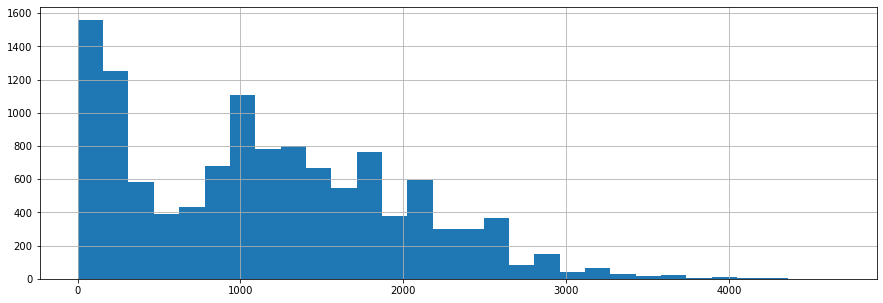

In [22]:
# Distributing the number of days since first review
data_df["time_since_first_review"].hist(bins=30, figsize=(15,5))

In [23]:
# Defining the binning function
def bin_column(col, bins, labels):
    data_df[col]=data_df[col].astype(float)
    data_df[col]=pd.cut(data_df[col], bins=bins, labels=labels, include_lowest=True)
    data_df[col]=data_df[col].astype('str')
    data_df[col]=data_df[col].replace({"nan": "no review"})

In [24]:
# Binning time since first review
bin_column("time_since_first_review",
          bins=[0,180,365,730, 1460, max(data_df.time_since_first_review)],
          labels=['0-6 months',
                 '6-12 months',
                 '1-2 years',
                 '2-3 years',
                 '4+ years'])

In [25]:
#Check the value counts
data_df["time_since_first_review"].value_counts()

4+ years       4049
2-3 years      3758
no review      3223
0-6 months     1786
6-12 months    1265
1-2 years      1090
Name: time_since_first_review, dtype: int64

In [26]:
# Follow same process for last_review
data_df["last_review"]=pd.to_datetime(data_df["last_review"])

# Calculate the number of days since last review and date compilation
data_df["time_since_last_review"]=(pd.datetime(2022,6,6) - data_df["last_review"]).astype('timedelta64[D]')

C:\Users\SUKANY~1\AppData\Local\Temp/ipykernel_3660/3389385167.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_df["time_since_last_review"]=(pd.datetime(2022,6,6) - data_df["last_review"]).astype('timedelta64[D]')


<AxesSubplot:>

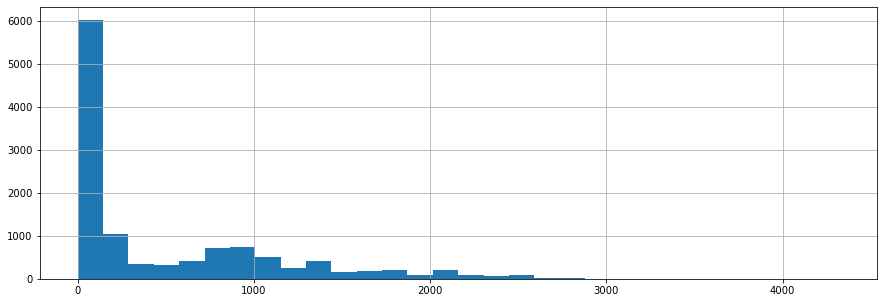

In [27]:
# Distributing the number of days since last review
data_df["time_since_last_review"].hist(bins=30, figsize=(15,5))

In [28]:
# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(data_df.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'])
           

In [29]:
# Check the value count
data_df["time_since_last_review"].value_counts()

1+ year        4672
no review      3223
2-8 weeks      2610
0-2 weeks      2347
2-6 months     1473
6-12 months     846
Name: time_since_last_review, dtype: int64

In [30]:
#Drop the original columns
data_df.drop(columns=["first_review", "last_review"], axis=1, inplace=True)

#### *review_rating_columns*

These columns have been binned into three categories based on their scores - poor, average and excellent


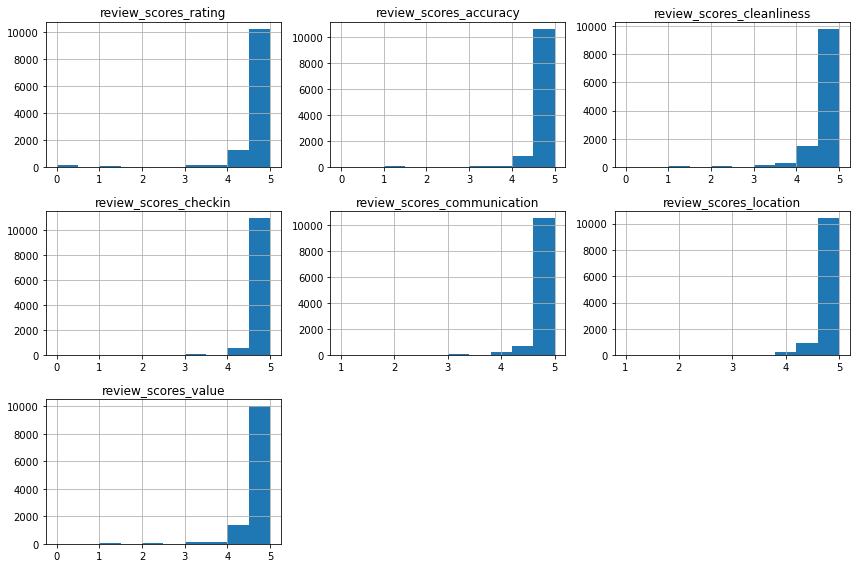

In [31]:
# Checking the distributions of the review ratings columns
review_variables = list(data_df.columns[data_df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(review_variables):
    ax = fig.add_subplot(3,3,i+1)
    data_df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [32]:
# Defining the binning function
def bin_column_review(col, bins, labels):
    data_df[col]=pd.cut(data_df[col], bins=bins, labels=labels, include_lowest=True)
    data_df[col]=data_df[col].astype('str')
    data_df[col]=data_df[col].replace({"nan": "no rating"})

In [33]:
# Binning the review_rating columns
for col in review_variables:
    bin_column_review(col,
                     bins=[0,2,4,5],
                     labels=["poor", "average", "excellent"])

#### *Replacing t/f with 1/0 in required columns*

In [34]:
# Replacing columns with f/t with 0/1
data_df.replace({"f": 0, "t": 1}, inplace=True)

#### *Checking for Outliers*

#### *price*

In [35]:
data_df["price"].describe()

count    15171.000000
mean       178.591457
std        316.157766
min          0.000000
25%         75.000000
50%        120.000000
75%        200.000000
max      13000.000000
Name: price, dtype: float64

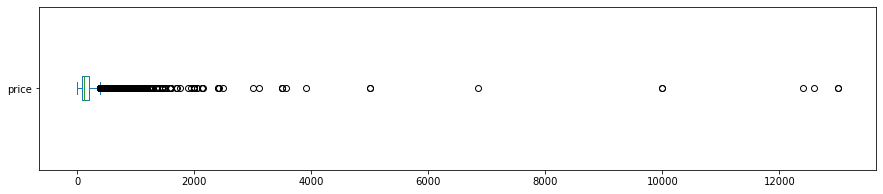

In [36]:
# Check the price column for outliers
data_df.price.plot(kind="box", vert=False, figsize=(15,3))
plt.show()


In [37]:
#Check the entries for listing price greater than 800
data_df.loc[data_df["price"]>800]["price"].describe()

count      226.000000
mean      1685.106195
std       1855.060006
min        802.000000
25%        949.250000
50%       1128.000000
75%       1928.750000
max      13000.000000
Name: price, dtype: float64

In [38]:
# Count the cases where listing price is 0
data_df.loc[data_df.price==0]["price"].count()

1

In [39]:
# Drop the rows where price is greater than 800
data_df.drop(data_df[data_df.price>800].index, axis=0, inplace=True)

#Drop the row where price is greater than 0
data_df.drop(data_df[data_df.price==0].index, axis=0, inplace=True)

<AxesSubplot:>

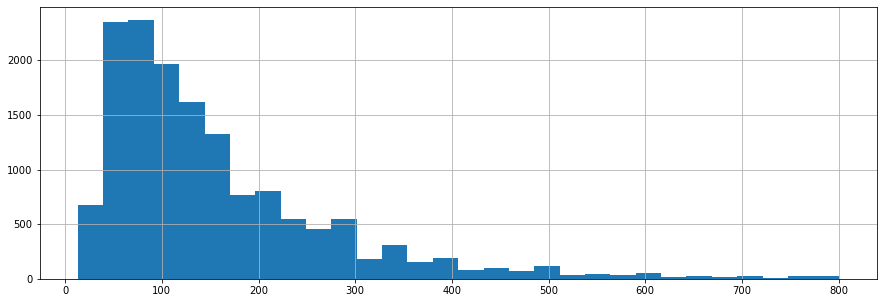

In [40]:
data_df.price.hist(bins=30, figsize=(15,5))

#### *minimum_nights*

In [41]:
data_df["minimum_nights"].describe()

count    14944.000000
mean        25.514320
std         42.991313
min          1.000000
25%          3.000000
50%         28.000000
75%         28.000000
max       1125.000000
Name: minimum_nights, dtype: float64

In [42]:
#Check the entries for minimum nights higher than 90
data_df.loc[data_df["minimum_nights"]>90]["minimum_nights"].describe()

count     323.000000
mean      227.959752
std       184.452290
min        91.000000
25%       120.000000
50%       180.000000
75%       229.000000
max      1125.000000
Name: minimum_nights, dtype: float64

<AxesSubplot:>

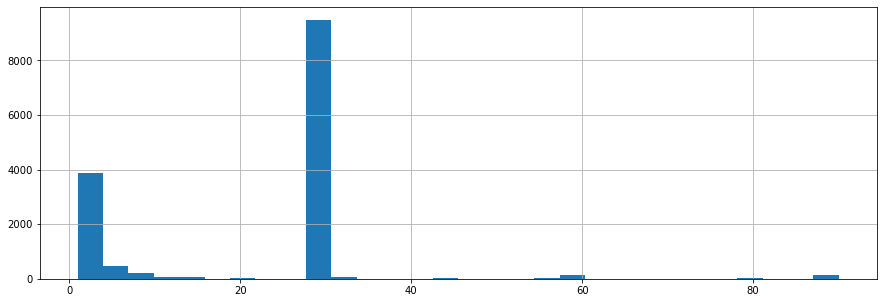

In [43]:
# Drop the rows where minimum_nights is greater than 90
data_df.drop(data_df[data_df.minimum_nights>90].index, axis=0, inplace=True)
data_df.minimum_nights.hist(bins=30, figsize=(15,5))

In [44]:
#Drop additinal null values
data_df.dropna(how="any", inplace=True)

In [45]:
#Check the data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14616 entries, 0 to 15170
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           14616 non-null  int64  
 1   name                         14616 non-null  object 
 2   host_response_time           14616 non-null  object 
 3   host_response_rate           14616 non-null  object 
 4   host_is_superhost            14616 non-null  float64
 5   host_listings_count          14616 non-null  float64
 6   host_identity_verified       14616 non-null  float64
 7   neighbourhood_cleansed       14616 non-null  object 
 8   latitude                     14616 non-null  float64
 9   longitude                    14616 non-null  float64
 10  property_type                14616 non-null  object 
 11  room_type                    14616 non-null  object 
 12  accommodates                 14616 non-null  int64  
 13  bedrooms        

<AxesSubplot:>

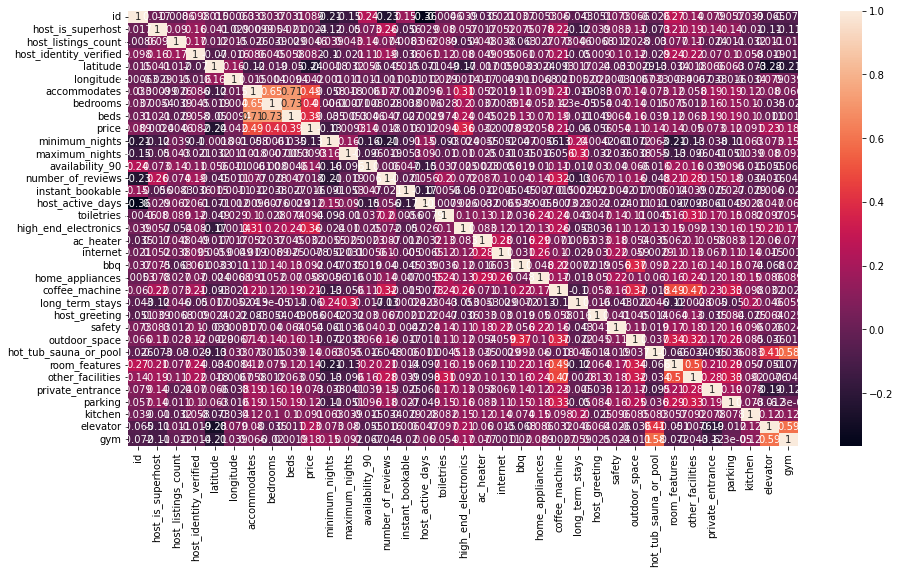

In [46]:
# Create a correlation matrix to show the correlation between variables
corr=data_df.corr(method="kendall")
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [47]:
# # Numerical Features to be included in ML
new_data_df=data_df[["host_is_superhost", "host_identity_verified", "instant_bookable","bedrooms","minimum_nights","number_of_reviews","availability_90","toiletries",
                     "high_end_electronics","ac_heater","internet","home_appliances","bbq","coffee_machine","long_term_stays","host_greeting","safety","outdoor_space","other_facilities","private_entrance",
                    "parking", "kitchen", "elevator","price"]]

In [48]:
# # # Numerical Features to be included in ML
# new_data_df=data_df[["host_is_superhost", "host_identity_verified", "instant_bookable","bedrooms","minimum_nights","number_of_reviews","availability_90",
#                     "toiletries", "high_end_electronics","ac_heater","internet","bbq","home_appliances","coffee_machine","long_term_stays","host_greeting","safety","outdoor_space","hot_tub_sauna_or_pool","room_features","other_facilities","private_entrance",
#                     "parking", "kitchen", "elevator","gym","price"]]

In [49]:
# # # Processng Categorical Features
# for cat_feature in ["host_response_time","host_response_rate","neighbourhood_cleansed","property_type","room_type","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value"]:
#     new_data_df=pd.concat([new_data_df, pd.get_dummies(data_df[cat_feature])], axis=1)

In [50]:
# # Processng Categorical Features
for cat_feature in ["host_response_time","neighbourhood_cleansed","host_response_rate","room_type","property_type","review_scores_rating","review_scores_cleanliness","review_scores_checkin","review_scores_location",
                   "review_scores_accuracy","review_scores_communication","review_scores_value"]:
    new_data_df=pd.concat([new_data_df, pd.get_dummies(data_df[cat_feature])], axis=1)

In [51]:
new_data_df.head()

,host_is_superhost,host_identity_verified,instant_bookable,bedrooms,minimum_nights,number_of_reviews,availability_90,toiletries,high_end_electronics,ac_heater,...,no rating,poor,average,excellent,no rating,poor,average,excellent,no rating,poor
0,0.0,1.0,0,5.0,28,7,0,1.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,0
2,0.0,1.0,0,1.0,90,26,0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,0
4,1.0,1.0,0,2.0,28,114,53,1.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,0
6,0.0,1.0,0,2.0,2,42,22,1.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,0
7,0.0,1.0,0,1.0,28,83,18,1.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,0


In [52]:
# #Create Target and Feature Variables
X=new_data_df.drop(["price"], axis=1)
y=new_data_df["price"]

# #Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=78)

In [53]:
# # Create a StandardScaler Instance
scaler=StandardScaler()

# #Fit the StandardScaler
X_scaler=scaler.fit(X_train)

# #Scale the data
X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

In [54]:
# # Run the Linear Regression model
model=HistGradientBoostingRegressor(learning_rate=0.1)
model.fit(X_train_scaled, y_train)

HistGradientBoostingRegressor()

In [55]:
# #Making predictions using the testing data
predictions=model.predict(X_test_scaled)
predictions

array([388.16130174, 122.03746622, 195.11239154, ..., 211.16084586,
        83.27278609, 145.5306842 ])

In [56]:
results=pd.DataFrame({"Prediction" : predictions, "Actual" : y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,388.161302,389.0
1,122.037466,139.0
2,195.112392,94.0
3,283.632433,236.0
4,61.274767,35.0
5,379.875451,479.0
6,190.216192,161.0
7,64.237038,60.0
8,58.877584,55.0
9,259.557544,295.0


In [57]:
from sklearn.metrics import r2_score
print(r2_score(y_test, predictions))

0.6123587210350909
